Analizando la Rotación de Clientes en Telecomunicaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset


df = pd.read_csv('../data/Telco-Customer-Churn.csv')

# Exploración inicial
print(df.info())  # Ver la estructura del dataset, tipos de datos y valores faltantes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
print(df.head(10))  # Mostrar primeras 10 filas para inspeccionar los datos



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [3]:
print(df.describe())  # Ver las estadísticas descriptivas


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


1.1. Identificar y solucionar cualquier valor duplicado.

In [4]:
# se identifica los valores duplicados
duplicados = df.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

# se elimina duplicados si es que hay
df = df.drop_duplicates()


Duplicados encontrados: 0


1.2. Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [5]:
#convertir columnas a numeros
col_numeric =  ['SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges',]

for i in col_numeric:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# convertir a cadena

df['customerID'] = df['customerID'].astype(str)  

# convertir a categorias

col_categorias = ['gender', 'Partner', 'Dependents', 'OnlineBackup', 'Contract',
'PhoneService', 'MultipleLines','PaymentMethod', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',]

for i in col_categorias:
    df[i] = df[i].astype('category')  


print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

1.3.Identificar y solucionar cualquier inconsistencia en los valores categóricos

In [6]:
# Lista de columnas categóricas a estandarizar
col_categorias = ['gender', 'Partner', 'Dependents', 'OnlineBackup', 'Contract',
'PhoneService', 'MultipleLines','PaymentMethod', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',]

# Aplicar strip() y lower() a cada columna de la lista para solucionar inconsistencia en los valores
df[col_categorias] = df[col_categorias].apply(lambda col: col.str.strip().str.lower())


1.4. Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [11]:
# Verificar valores faltantes
valores_faltantes = df.isnull().sum()
print(valores_faltantes)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Rellenar valores faltantes según el tipo de dato.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())  # Rellenar con la media

df['TotalCharges']



0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

1.5. Identificar y solucionar cualquier punto de dato inapropiado o inusual

In [8]:

# Lista de columnas numéricas a analizar
col_numeric =  ['tenure', 'TotalCharges', 'MonthlyCharges',]
# Crear un diccionario para almacenar los outliers detectados
outliers_dict = {}

# Detectar outliers para cada columna numérica
for col in col_numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outliers_dict[col] = outliers
    print(f"Outliers detectados en {col}:")
    print(outliers)


Outliers detectados en tenure:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Outliers detectados en TotalCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Outliers detectados en MonthlyCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Str

2.1. Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

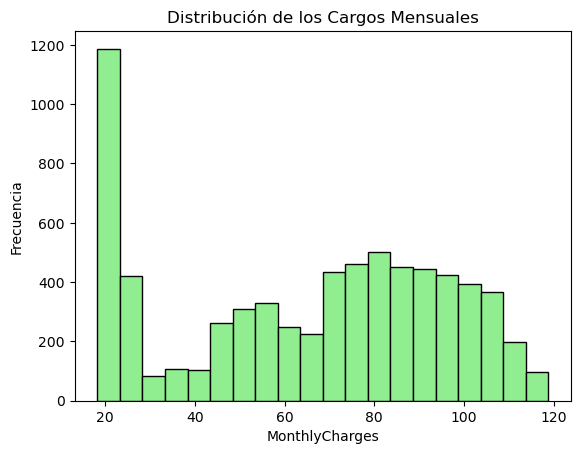

In [11]:
# Histograma de Cargos Mensuales
plt.hist(df['MonthlyCharges'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de los Cargos Mensuales')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación:
Este histograma muestra cómo se distribuyen los cargos mensuales entre los clientes.
La mayoría de los clientes parece pagar una cantidad mensual en un rango específico.

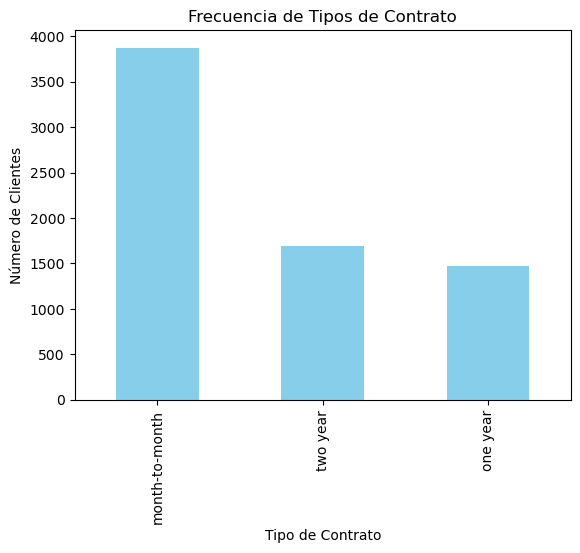

In [12]:
# Gráfico de barras para Tipo de Contrato
df['Contract'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


# Interpretación:
Este gráfico de barras muestra cuántos clientes tienen cada tipo de contrato.
Podemos ver que la opción 'Mes-a-mes' es la más común entre los clientes.

2.2. Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

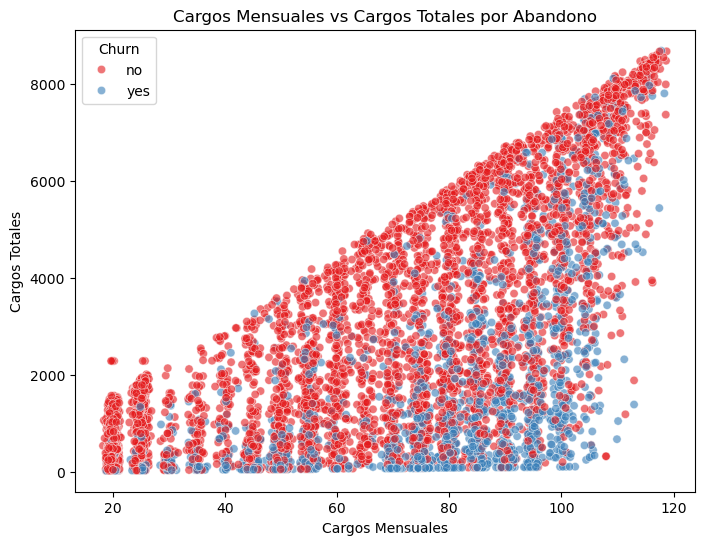

In [13]:
# Gráfico de dispersión con Abandono
plt.figure(figsize=(8,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df, alpha=0.6, palette='Set1')
plt.title('Cargos Mensuales vs Cargos Totales por Abandono')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Cargos Totales')
plt.show()

# Interpretación:
Este gráfico de dispersión muestra la relación entre los cargos mensuales y totales, con los puntos coloreados según si el cliente abandonó o no.
Se puede ver si los clientes con altos cargos tienen más probabilidad de abandonar.

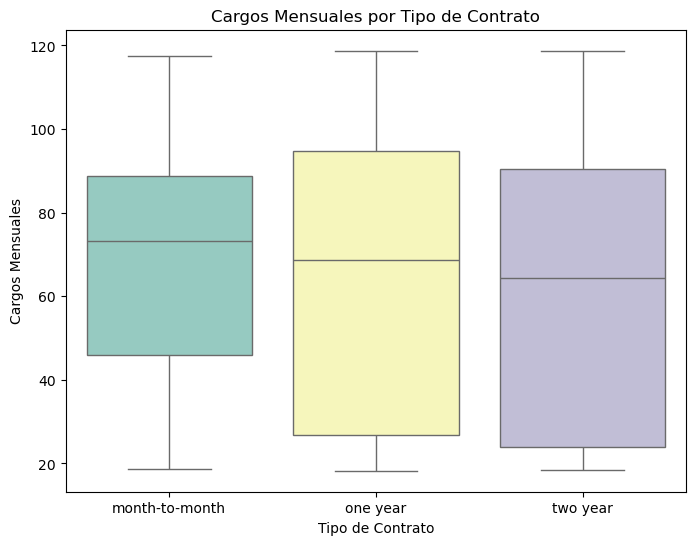

In [23]:
# Gráfico de cajas para Cargos Mensuales por Tipo de Contrato
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Contract', data=df, palette='Set3', legend=False)
plt.title('Cargos Mensuales por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cargos Mensuales')
plt.show()

# Interpretación:
El gráfico de cajas compara la distribución de los cargos mensuales según el tipo de contrato.
Podemos observar cómo la mediana y la variabilidad de los cargos difieren entre los diferentes tipos de contrato.